# Importing and Querying Data with PostgreSQL (Northwind Database)

Tutorials: https://www.youtube.com/watch?v=zpnHsWOy0RY&list=PLP9IO4UYNF0UQkBXlTMSw0CYsxv-GDkkI

All data and many examples of SQL-Queries are available here: https://www.w3schools.com/sql/default.asp

## Libraries and Settings

In [15]:
# Libraries
import os
import pandas as pd
from sqlalchemy import create_engine, text
import matplotlib.pyplot as plt

# Settings
import warnings
warnings.filterwarnings("ignore")

# Current working directory
print(os.getcwd())

u:\Lektionen\GitHub_Repositories\python_postgresql_pgadmin


## Read apartment data to separate data frames

In [16]:
# Read data from .csv files
df_customers = pd.read_csv('Data/Customers.csv', sep=';')
df_categories = pd.read_csv('Data/Categories.csv', sep=';')
df_employees = pd.read_csv('Data/Employees.csv', sep=';')
df_order_details = pd.read_csv('Data/OrderDetails.csv', sep=';')
df_orders = pd.read_csv('Data/Orders.csv', sep=';')
df_products = pd.read_csv('Data/Products.csv', sep=';')
df_shippers = pd.read_csv('Data/Shippers.csv', sep=';')
df_suppliers = pd.read_csv('Data/Suppliers.csv', sep=';')

# Change column names to lowercase
df_customers.columns = df_customers.columns.str.lower()
df_categories.columns = df_categories.columns.str.lower()
df_employees.columns = df_employees.columns.str.lower()
df_order_details.columns = df_order_details.columns.str.lower()
df_orders.columns = df_orders.columns.str.lower()
df_products.columns = df_products.columns.str.lower()
df_shippers.columns = df_shippers.columns.str.lower()
df_suppliers.columns = df_suppliers.columns.str.lower()

# Check dimensions of DataFrames
print("Dimensions of all DataFrames:")
print(f"Customers: {df_customers.shape}")
print(f"Categories: {df_categories.shape}")
print(f"Employees: {df_employees.shape}")
print(f"OrderDetails: {df_order_details.shape}")
print(f"Orders: {df_orders.shape}")
print(f"Products: {df_products.shape}")
print(f"Shippers: {df_shippers.shape}")
print(f"Suppliers: {df_suppliers.shape}")


Dimensions of all DataFrames:
Customers: (91, 7)
Categories: (8, 3)
Employees: (10, 6)
OrderDetails: (518, 4)
Orders: (196, 5)
Products: (77, 6)
Shippers: (3, 3)
Suppliers: (29, 8)


## Create database connection

In [17]:
# Set up database connection
user = "pgadmin"
password = "geheim"
host = "localhost"
port = "5432"
database = "postgres"

# Create Connection URL
db_connection_url = "postgresql://" + user + ":" + password +\
                    "@" + host + ":" + port + "/" + database

# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Test database connection
with engine.connect() as connection:
    result = connection.execute(text('SELECT current_database()'))
    print(result.fetchone())

# Dispose the engine
engine.dispose()

('postgres',)


## Write data frames to database tables

In [18]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write DataFrames to database
df_customers.to_sql('customers', engine, if_exists='replace')
df_categories.to_sql('categories', engine, if_exists='replace')
df_employees.to_sql('employees', engine, if_exists='replace')
df_order_details.to_sql('order_details', engine, if_exists='replace')
df_orders.to_sql('orders', engine, if_exists='replace')
df_products.to_sql('products', engine, if_exists='replace')
df_shippers.to_sql('shippers', engine, if_exists='replace')
df_suppliers.to_sql('suppliers', engine, if_exists='replace')

# Dispose the engine
engine.dispose()

## List tables in the database

In [19]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Open a connection
with engine.connect() as connection:

    # Execute the query
    result = connection.execute(text("""SELECT table_name
                                        FROM information_schema.tables
                                        WHERE table_schema = 'public'"""))
    
    # Fetch and print the results
    for row in result:
        print(row[0])

# Dispose the engine
engine.dispose()

customers
categories
employees
order_details
orders
products
shippers
suppliers


## Make SQL query to select data

In [20]:
# Create SQLAlchemy Engine
engine = create_engine(db_connection_url)

# Write data to table
df_sub = pd.read_sql_query('''SELECT 
                                  p.ProductID, 
                                  p.ProductName, 
                                  c.CategoryName,
                                  p.Price
                              FROM Products AS p
                              INNER JOIN 
                                  Categories AS c ON p.CategoryID = c.CategoryID;''', 
                          con=engine)

# Dispose the engine
engine.dispose()

# Show the data
df_sub

,productid,productname,categoryname,price
0,76,Lakkalikööri,Beverages,18.00
1,75,Rhönbräu Klosterbier,Beverages,7.75
2,70,Outback Lager,Beverages,15.00
3,67,Laughing Lumberjack Lager,Beverages,14.00
4,43,Ipoh Coffee,Beverages,46.00
...,...,...,...,...
72,36,Inlagd Sill,Seafood,19.00
73,30,Nord-Ost Matjeshering,Seafood,25.89
74,18,Carnarvon Tigers,Seafood,62.50
75,13,Konbu,Seafood,6.00


## Plot product prices

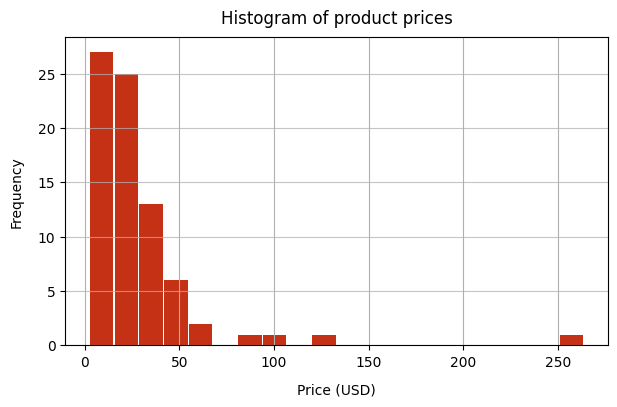

In [23]:
# Plot Histogram
fig = plt.figure( figsize=(7,4))
plt.xticks(fontsize=14, rotation=0)
plt.yticks(fontsize=14, rotation=0)
n, bins, patches = plt.hist(x=df_sub['price'], 
                            bins=20, 
                            color='#C53115',
                            alpha=1.00, 
                            rwidth=0.95
                   )
plt.grid(True)
plt.ticklabel_format(style='plain')
plt.grid(axis='y', alpha=0.75)

# Set labels
plt.xlabel('Price (USD)', fontsize=10, labelpad=10)
plt.ylabel('Frequency', fontsize=10, labelpad=10)
plt.title('Histogram of product prices', fontsize=12, pad=10)

# Set fontsize of tick labels
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.show()

### Jupyter notebook --footer info-- (please always provide this at the end of each notebook)

In [22]:
import os
import platform
import socket
from platform import python_version
from datetime import datetime

print('-----------------------------------')
print(os.name.upper())
print(platform.system(), '|', platform.release())
print('Datetime:', datetime.now().strftime("%Y-%m-%d %H:%M:%S"))
print('Python Version:', python_version())
print('-----------------------------------')

-----------------------------------
NT
Windows | 11
Datetime: 2024-09-09 20:05:16
Python Version: 3.12.4
-----------------------------------
